In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from pylab import *

In [2]:
df = pd.read_csv(r"C:\Users\darshini\OneDrive\Documents\miningprocess_flotation_plant_dataset.csv",decimal=',',parse_dates=["date"],infer_datetime_format=True).drop_duplicates()

C:\Users\darshini\AppData\Local\Temp\ipykernel_15240\2960789863.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(r"C:\Users\darshini\OneDrive\Documents\miningprocess_flotation_plant_dataset.csv",decimal=',',parse_dates=["date"],infer_datetime_format=True).drop_duplicates()


In [3]:
df.shape

(736282, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date                      736282 non-null  object 
 1   % Iron Feed               736282 non-null  float64
 2   % Silica Feed             736282 non-null  float64
 3   StarchFlow                736282 non-null  float64
 4   AminaFlow                 736282 non-null  float64
 5   OrePulpFlow               736282 non-null  float64
 6   OrePulppH                 736282 non-null  float64
 7   OrePulpDensity            736282 non-null  float64
 8   FlotationColumn01AirFlow  736282 non-null  float64
 9   FlotationColumn02AirFlow  736282 non-null  float64
 10  FlotationColumn03AirFlow  736282 non-null  float64
 11  FlotationColumn04AirFlow  736282 non-null  float64
 12  FlotationColumn05AirFlow  736282 non-null  float64
 13  FlotationColumn06AirFlow  736282 non-null  float6

In [5]:
df.head(10)

,date,% Iron Feed,% Silica Feed,StarchFlow,AminaFlow,OrePulpFlow,OrePulppH,OrePulpDensity,FlotationColumn01AirFlow,FlotationColumn02AirFlow,...,FlotationColumn07AirFlow,FlotationColumn01Level,FlotationColumn02Level,FlotationColumn03Level,FlotationColumn04Level,FlotationColumn05Level,FlotationColumn06Level,FlotationColumn07Level,%IronConcentrate,%SilicaConcentrate
0,10-03-2017 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,10-03-2017 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,10-03-2017 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,10-03-2017 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,10-03-2017 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
5,10-03-2017 01:00:00,55.2,16.98,3079.10,564.697,396.533,10.0705,1.74,250.730,248.906,...,251.873,444.384,443.269,460.449,439.920,451.588,433.539,425.458,66.91,1.31
6,10-03-2017 01:00:00,55.2,16.98,3127.79,566.467,392.900,10.0713,1.74,250.313,252.202,...,253.477,446.185,444.571,452.306,431.328,443.548,444.575,431.251,66.91,1.31
7,10-03-2017 01:00:00,55.2,16.98,3152.93,558.777,397.002,10.0722,1.74,249.895,253.630,...,253.345,445.985,461.341,461.640,442.067,441.730,461.770,449.679,66.91,1.31
8,10-03-2017 01:00:00,55.2,16.98,3147.27,556.030,394.307,10.0730,1.74,250.137,251.104,...,250.884,446.686,478.385,459.103,455.074,439.798,457.738,455.915,66.91,1.31
9,10-03-2017 01:00:00,55.2,16.98,3142.58,565.857,393.105,10.0738,1.74,249.653,252.202,...,248.137,445.685,478.779,460.665,457.225,453.236,449.898,455.750,66.91,1.31


In [6]:
df['date'] = pd.to_datetime(df['date'], format= "%d-%m-%Y %H:%M:%S")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      736282 non-null  datetime64[ns]
 1   % Iron Feed               736282 non-null  float64       
 2   % Silica Feed             736282 non-null  float64       
 3   StarchFlow                736282 non-null  float64       
 4   AminaFlow                 736282 non-null  float64       
 5   OrePulpFlow               736282 non-null  float64       
 6   OrePulppH                 736282 non-null  float64       
 7   OrePulpDensity            736282 non-null  float64       
 8   FlotationColumn01AirFlow  736282 non-null  float64       
 9   FlotationColumn02AirFlow  736282 non-null  float64       
 10  FlotationColumn03AirFlow  736282 non-null  float64       
 11  FlotationColumn04AirFlow  736282 non-null  float64       
 12  Flotati

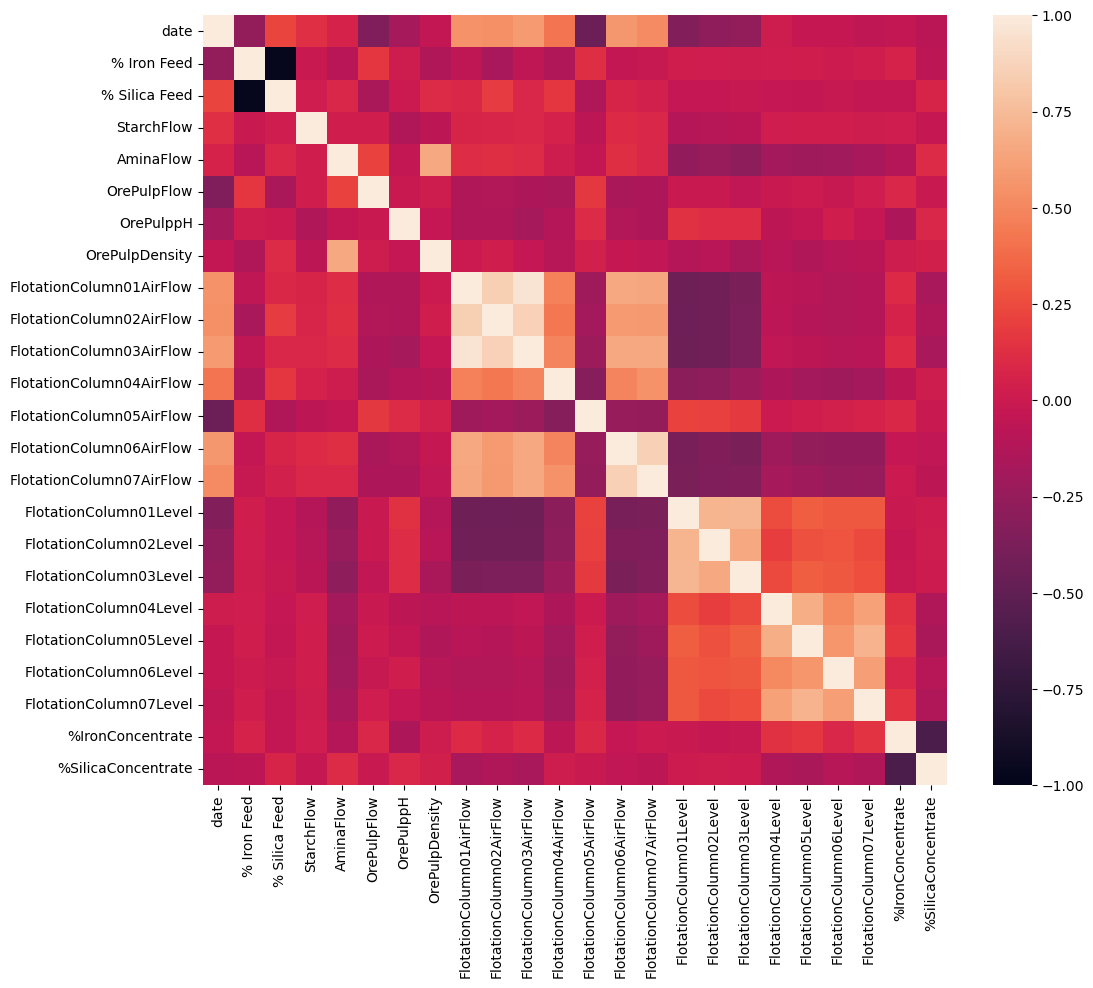

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0)
plt.show()